<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')

In [61]:
nifty = pd.read_csv('/content/MMI_2024-01-06.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames

In [62]:
nifty.head(2)

,Date,MMI,Nifty
0,05/01/2024,70.065623,21710.8
1,04/01/2024,69.907304,21658.6


In [63]:
#data = pd.DataFrame({'Date':['25/12/2023'] ,'MMI': [57.50],'Nifty':[21349.40]})

In [64]:
#nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,05/01/2024,70.065623,21710.80
1,04/01/2024,69.907304,21658.60
2,03/01/2024,57.550582,21517.35


In [65]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [66]:
'''
if TypeError or ValueError:
    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
else:
    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')
'''

"\nif TypeError or ValueError:\n    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')\nelse:\n    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')\n"

In [67]:
nifty= nifty.set_index('Date')

In [68]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [69]:
nifty_new=nifty[::-1].copy()

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
stdv = 1.0
nifty_new['macd']=nifty_new['MMI'].ewm(span=50, adjust=False).mean()-nifty_new['MMI'].ewm(span=200, adjust=False).mean()
nifty_new['signal']=nifty_new['macd'].ewm(span=35,adjust=False).mean()
nifty_new['Sdev'] = nifty_new['macd'].rolling(window=35).std()
nifty_new['Upper Band'] = nifty_new['signal'] + (nifty_new['Sdev'] *stdv)
nifty_new['Lower Band'] = nifty_new['signal'] - (nifty_new['Sdev'] *stdv)
nifty_new['difference']=nifty_new['Upper Band']-nifty_new['Lower Band']
nifty_new['difference']=scaler.fit_transform(nifty_new['difference'].values.reshape(-1,1))
#nifty_new['Upper Band']=nifty['Upper Band'].shift(-35)
#nifty_new['Lower Band']=nifty['Lower Band'].shift(-35)

In [73]:
nifty['30 Day'] = nifty['MMI'][::-1].rolling(window=30).mean()
nifty['10 Day'] = nifty['MMI'][::-1].rolling(window=10).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

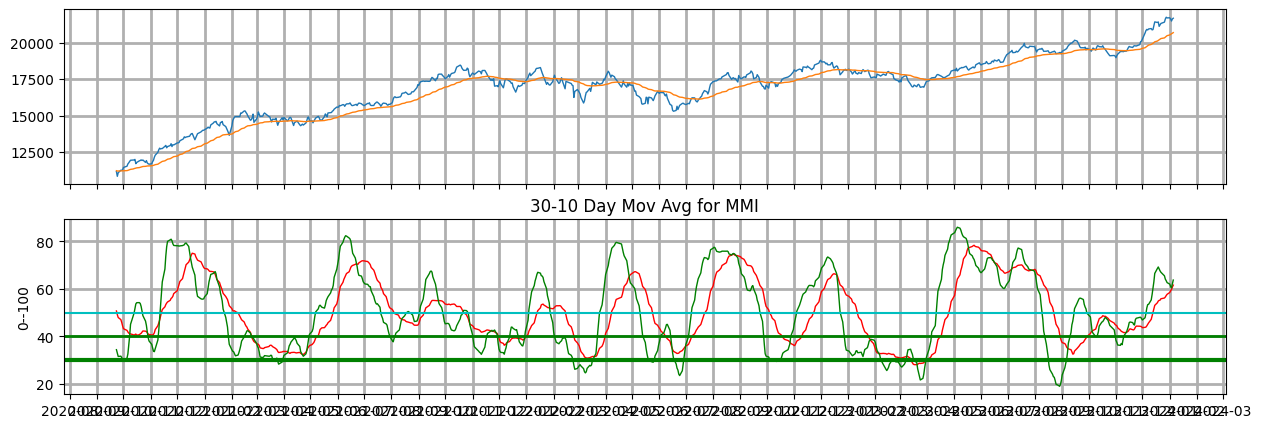

In [74]:
from matplotlib.dates import MonthLocator, YearLocator
t=800
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['30 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color= 'g',linewidth=1 )

ax[1].axhline(y=50 , color= 'c')
ax[1].axhline(y=40 , color= 'g',linewidth=2)
ax[1].axhline(y=30 , color= 'g',linewidth=3)
plt.title('30-10 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)

plt.savefig('mmi.png')
plt.show()

In [75]:
nifty=nifty.head(800)

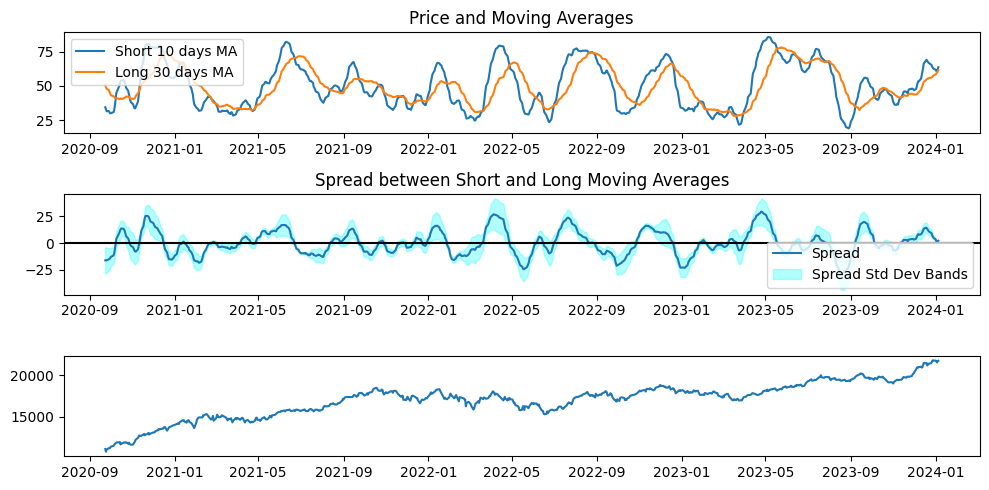

In [76]:
# Define the short and long moving averages
short_window = 10
long_window = 30

# Calculate the short and long moving averages
nifty['Short_MA'] = nifty['10 Day']
nifty['Long_MA'] = nifty['30 Day']
# Calculate the spread between the two moving averages
nifty['Spread'] = nifty['Short_MA'] - nifty['Long_MA']

# Calculate the standard deviation of the spread
nifty['Spread_Std'] = nifty['Spread'].rolling(window=20, min_periods=1).std()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

# Plot the data in the first subplot
#axes[0].plot(nifty.index, nifty['Price'], label='Price')
axes[0].plot(nifty.index, nifty['Short_MA'], label=f'Short {short_window} days MA')
axes[0].plot(nifty.index, nifty['Long_MA'], label=f'Long {long_window} days MA')
axes[0].set_title('Price and Moving Averages')
axes[0].legend()

# Plot the spread with standard deviation bands in the second subplot
axes[1].plot(nifty.index, nifty['Spread'], label='Spread')
axes[1].fill_between(nifty.index, nifty['Spread'] + nifty['Spread_Std'], nifty['Spread'] - nifty['Spread_Std'], color='cyan', alpha=0.3, label='Spread Std Dev Bands')
axes[1].set_title('Spread between Short and Long Moving Averages')
axes[1].axhline(y=0, color='black')
axes[1].legend()

axes[2].plot(nifty.index, nifty['Nifty'], label='Price')
# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()


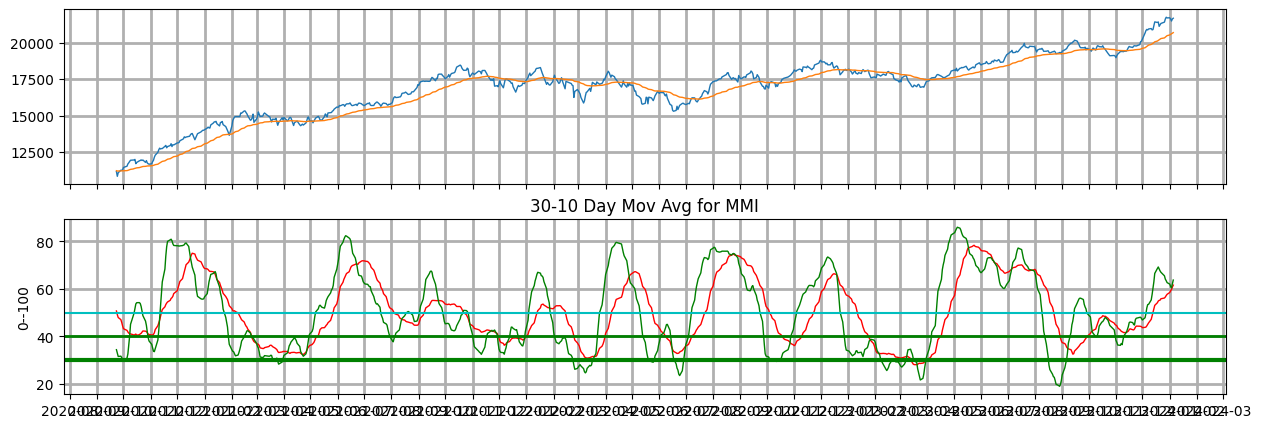

In [77]:
from matplotlib.dates import MonthLocator, YearLocator
t=1600
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['30 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color= 'g',linewidth=1 )

ax[1].axhline(y=50 , color= 'c')
ax[1].axhline(y=40 , color= 'g',linewidth=2)
ax[1].axhline(y=30 , color= 'g',linewidth=3)
plt.title('30-10 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)


plt.show()

In [78]:
nifty_new=nifty_new[-1000:].copy()

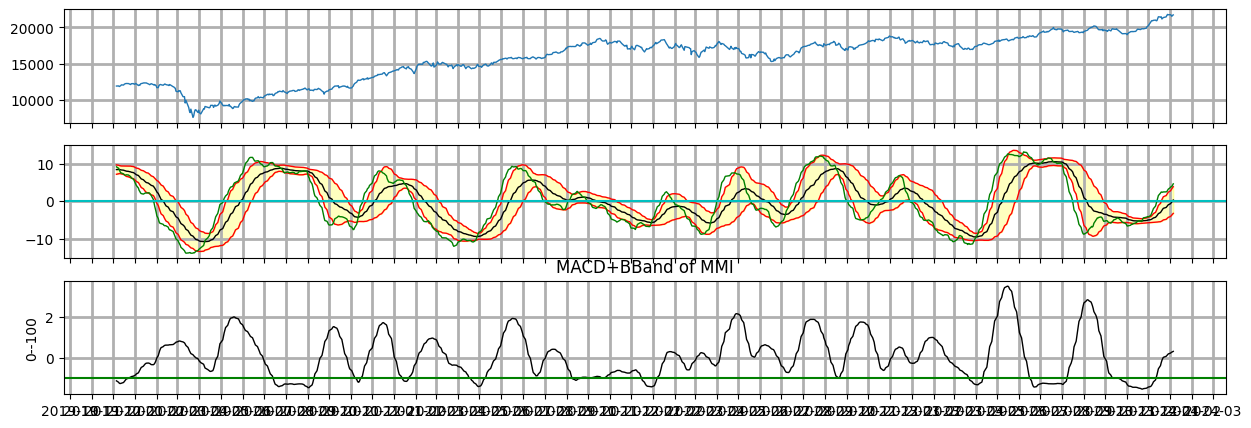

In [79]:
from matplotlib.dates import MonthLocator, YearLocator
fig, ax = plt.subplots(3,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty_new.index.values,nifty_new['Nifty'].values,linewidth=1 )
ax[1].plot(nifty_new.index.values,nifty_new['signal'].values,color='k',linewidth=1 )
ax[1].plot(nifty_new.index.values[:],nifty_new['Upper Band'].values[:],color='r',linewidth=1 )
ax[1].plot(nifty_new.index.values[:],nifty_new['Lower Band'].values[:],color='r',linewidth=1 )
ax[1].fill_between(
    nifty_new.index.values[:],nifty_new['Upper Band'].values[:], nifty_new['Lower Band'].values[:],
    interpolate=True, color="yellow", alpha=0.25,
    label="Positive"
)
ax[1].plot(nifty_new.index.values[:],nifty_new['macd'].values[:],color= 'g',linewidth=1 )
ax[2].plot(nifty_new.index.values[:],nifty_new['difference'].values[:],color= 'k',linewidth=1)
#ax[0].plot(nifty_new.index.values[:],nifty_new['50ema'].values[:],color= 'b',linewidth=1 )
ax[1].axhline(y=0 , color= 'c')
plt.title('MACD+BBand of MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[2].axhline(y=-1 , color= 'g')
plt.savefig('mmi_bb.png')
plt.show()


In [80]:
signals=np.where(nifty_new['macd']>nifty_new['signal'],1,0)

In [81]:
signals[-10:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
def plot_buy_sell_signal(df):
  signal=[]
  for i in range(len(df)):

    if df['10 Day'].iloc[i]<df['30 Day'].iloc[i] and df['10 Day'].iloc[i]<40 :
      signal.append(i)

  return signal

In [83]:
def draw_plot(labels,df,t=500):

  df=df[:t]
  buy=plot_buy_sell_signal(df)
  fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[0].plot(df.loc[:, :].index, df.loc[:, '50ema'], label='50 ema')
  ax[1].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[1].scatter(df.iloc[buy].index,df.iloc[buy].Nifty,marker='.',label='Volatile',color='r')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MMI-Regime ')
  ax[1].legend(loc='upper left')


  fig.suptitle(labels)
  plt.show()

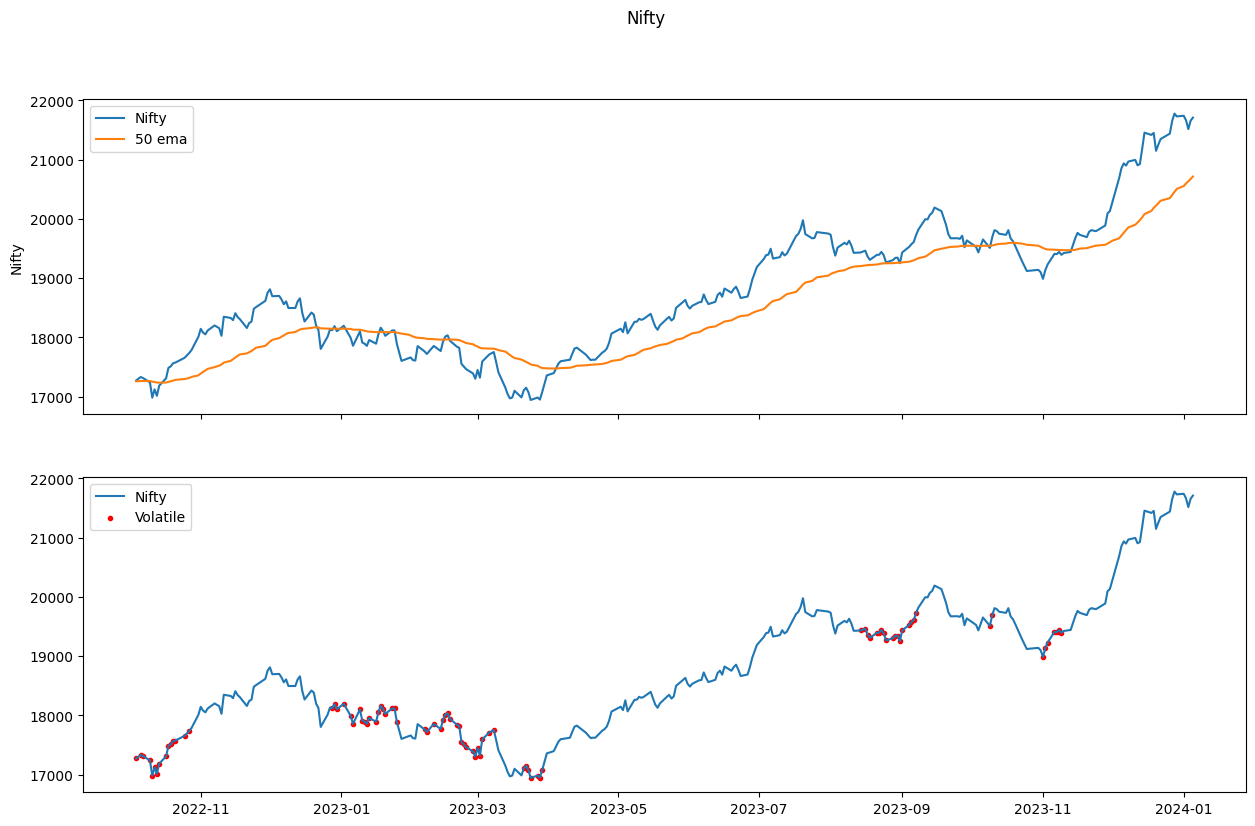

In [84]:
draw_plot('Nifty',nifty,300)

In [85]:
buy=plot_buy_sell_signal(nifty)

In [86]:
nifty.iloc[buy[0]].name

Timestamp('2023-11-09 00:00:00')

In [87]:
#https://www.python-graph-gallery.com/area-fill-between-two-lines-in-matplotlib